### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [18]:
df = pd.read_csv("/Users/ivanlamb/Documents/GitHub/Machine_Learning/2-No_Supervisado/3-Clustering/Practica/data/drugLibTrain_raw.tsv",sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [19]:
for col in df.select_dtypes('object').columns:
    print(f"{col}: ",df[col].nunique())

urlDrugName:  502
effectiveness:  5
sideEffects:  5
condition:  1426
benefitsReview:  3032
sideEffectsReview:  2814
commentsReview:  3047


In [20]:
for col in df.select_dtypes('object').columns:
    if df[col].nunique() > 10:
        df.drop(columns=col,inplace=True)
df.head()

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects


In [21]:
# pd.get_dummies(df)

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [22]:
df["effectiveness"].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [23]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [24]:
df["effectiveness"] = df["effectiveness"].replace(my_dict)

In [27]:
df["sideEffects"].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [28]:
my_dict = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [29]:
df["sideEffects"] = df["sideEffects"].replace(my_dict)

In [30]:
df.drop(df.select_dtypes('object').columns, inplace=True)

In [32]:
df.head()

,rating,effectiveness,sideEffects
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [33]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [34]:
k = 20

Mayor silhouette scores con K=2

In [35]:
modelos = [KMeans(n_clusters=i, random_state=42).fit(df) for i in range(2,k)]

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/clust

In [36]:
modelos

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42)]

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [39]:
scores = [silhouette_score(df, modelo.labels_) for modelo in modelos]

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

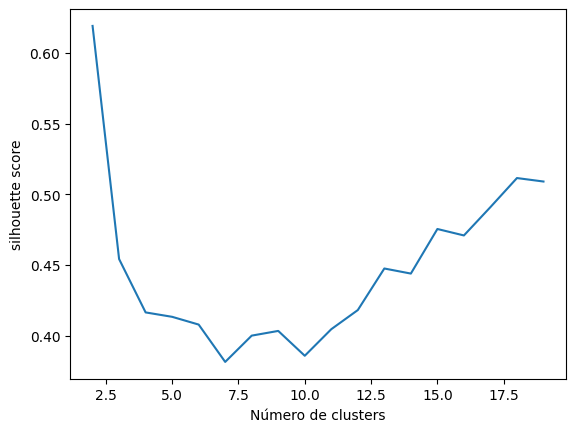

In [44]:
plt.plot(range(2,k), scores)
plt.xlabel("Número de clusters")
plt.ylabel("silhouette score");

In [46]:
iniertias = [modelo.inertia_ for modelo in modelos]
iniertias

[11137.736723639344,
 7254.022835331667,
 5691.624714323987,
 4805.423332643923,
 4235.4089338528165,
 3792.0124637174195,
 3312.188065712516,
 2992.635188439981,
 2880.825199750562,
 2612.052327151954,
 2412.7098531772426,
 2262.2181491819733,
 2155.4609956846843,
 2024.5392030429064,
 1948.8111101883303,
 1834.8104683094634,
 1718.9553463629836,
 1699.570859413715]

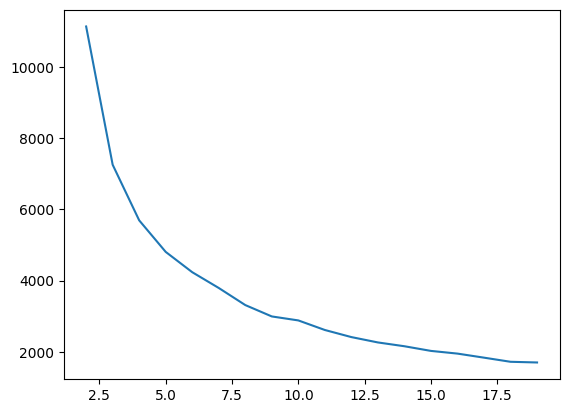

In [49]:
plt.plot(range(2,k), iniertias);


In [50]:
KMeans = KMeans(n_clusters=2, random_state=42).fit(df)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
KMeans.labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [52]:
df2 = pd.DataFrame(KMeans.labels_, columns=["Cluster"])

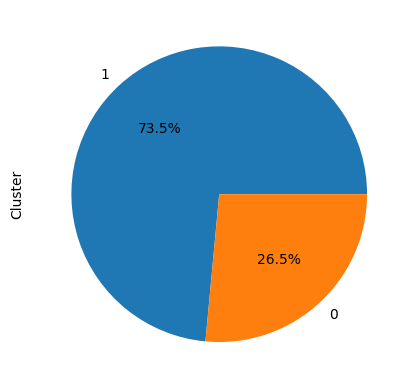

In [53]:
df2['Cluster'].value_counts().plot.pie(autopct="%.1f%%");